In [287]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

import torchio as tio
from torch.utils.data import DataLoader

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from seaborn import heatmap
from sklearn.metrics import confusion_matrix

from functions import *

In [288]:
metaData = pd.read_csv('../metaDataTrain.csv')
metaDataClean = metaData.iloc
subject_list = load_training_dataset(metaDataClean)

## Let us construct the features vectors

In [289]:
features = np.zeros((100, 10))  ## there are 5 features and 20 subjects per training class

features_metadata = select_row_x_and_y_from_table(metaDataClean, 2, 3)

## adding into features vectors
features[:,:2] = features_metadata

Let us add volume information to feature vectors

In [290]:
volumes_0_ed = []
volumes_1_ed = []
volumes_2_ed = []
volumes_3_ed = []

volumes_0_es = []
volumes_1_es = []
volumes_2_es = []
volumes_3_es = []
   
for i in range(0, 100):
    subject = subject_list[i]
    
    ed_view = subject.ed_seg
    volumes_0_ed.append(get_volume(ed_view, 0))
    volumes_1_ed.append(get_volume(ed_view, 1))
    volumes_2_ed.append(get_volume(ed_view, 2))
    volumes_3_ed.append(get_volume(ed_view, 3))

    es_view = subject.es_seg
    volumes_0_es.append(get_volume(es_view, 0))
    volumes_1_es.append(get_volume(es_view, 1))
    volumes_2_es.append(get_volume(es_view, 2))
    volumes_3_es.append(get_volume(es_view, 3))

volumes_0_ed = np.array([volumes_0_ed]).flatten()
volumes_1_ed = np.array([volumes_1_ed]).flatten()
volumes_2_ed = np.array([volumes_2_ed]).flatten()
volumes_3_ed = np.array([volumes_3_ed]).flatten()

volumes_0_es = np.array([volumes_0_es]).flatten()
volumes_1_es = np.array([volumes_1_es]).flatten()
volumes_2_es = np.array([volumes_2_es]).flatten()
volumes_3_es = np.array([volumes_3_es]).flatten()


for i, new_col in enumerate([volumes_0_ed[:], volumes_1_ed[:], volumes_2_ed[:], volumes_3_ed[:], volumes_0_es[:], volumes_1_es[:], volumes_2_es[:], volumes_3_es[:]]):
    features[:,i+2] = new_col

Let us just give our explicit class vector

In [291]:
classes = np.zeros((100))
classes[:20] = 2
classes[20:40] = 3
classes[40:60] = 1
classes[60:80] = 0
classes[80:100] = 4
classes = classes.astype('int')

## Time to tree out this stuff!

First split and transform data

In [292]:
scaler = StandardScaler().fit(features)

features_scaled = scaler.transform(features)
features_scaled, classes = shuffle(features_scaled, classes, random_state=32)
X_train, X_val, y_train, y_val = train_test_split(features_scaled, classes, test_size=0.25, stratify=classes, random_state=32)

Look for optimal parameters

In [293]:
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), learning_rate = 0.85, n_estimators=200)

clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.85, n_estimators=200)

In [294]:
y_val_preds = clf.predict(X_val)

test_accuracy = (y_val_preds == y_val).sum() / len(y_val)

Text(0.5, 1.0, 'Prediction on val set for ada LR 10D. 84% accuracy, CV at 78.67%')

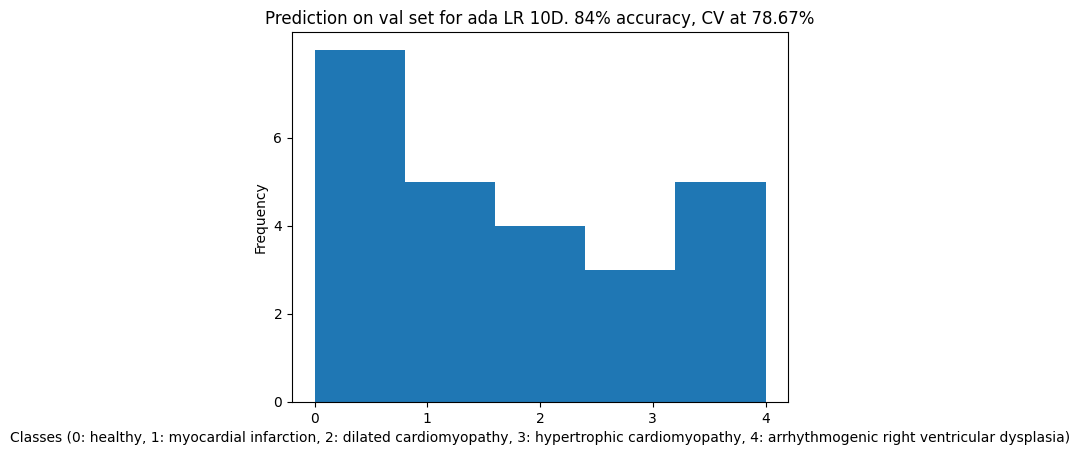

In [295]:
plt.hist(np.array(y_val_preds), bins=5)
plt.xticks([0,1,2,3,4])
plt.yticks([0, 2, 4, 6])
plt.xlabel('Classes (0: healthy, 1: myocardial infarction, 2: dilated cardiomyopathy, 3: hypertrophic cardiomyopathy, 4: arrhythmogenic right ventricular dysplasia)')
plt.ylabel('Frequency')
plt.title("Prediction on val set for ada LR 10D. {:.0f}% accuracy, CV at {:.2f}%".format(test_accuracy*100, 100*scores.mean()))

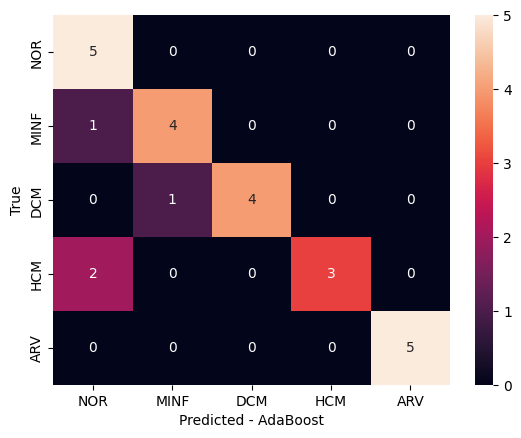

In [297]:
cm = confusion_matrix(y_val, y_val_preds, labels=[0,1,2,3,4])
heatmap(cm, annot=True, fmt='d', xticklabels=['NOR','MINF','DCM','HCM','ARV'], yticklabels=['NOR','MINF','DCM','HCM','ARV'])
plt.xlabel('Predicted - AdaBoost')
plt.ylabel('True')
plt.show()

## Now let us test that model on the test dataset

In [11]:
metaDataTest = pd.read_csv('../metaDataTest.csv')
metaDataClean = metaDataTest.iloc

test_subject_list = load_filled_test_dataset()

test_features = np.zeros((50, 10))  

test_features_metadata = select_row_x_and_y_from_table(metaDataClean, 1, 2)

## adding into features vectors
test_features[:,:2] = test_features_metadata

In [12]:
volumes_0_ed = []
volumes_1_ed = []
volumes_2_ed = []
volumes_3_ed = []

volumes_0_es = []
volumes_1_es = []
volumes_2_es = []
volumes_3_es = []
   
for i in range(0, 50):
    subject = test_subject_list[i]
    
    ed_view = subject.ed_seg
    volumes_0_ed.append(get_volume(ed_view, 0))
    volumes_1_ed.append(get_volume(ed_view, 1))
    volumes_2_ed.append(get_volume(ed_view, 2))
    volumes_3_ed.append(get_volume(ed_view, 3))

    es_view = subject.es_seg
    volumes_0_es.append(get_volume(es_view, 0))
    volumes_1_es.append(get_volume(es_view, 1))
    volumes_2_es.append(get_volume(es_view, 2))
    volumes_3_es.append(get_volume(es_view, 3))

volumes_0_ed = np.array([volumes_0_ed]).flatten()
volumes_1_ed = np.array([volumes_1_ed]).flatten()
volumes_2_ed = np.array([volumes_2_ed]).flatten()
volumes_3_ed = np.array([volumes_3_ed]).flatten()

volumes_0_es = np.array([volumes_0_es]).flatten()
volumes_1_es = np.array([volumes_1_es]).flatten()
volumes_2_es = np.array([volumes_2_es]).flatten()
volumes_3_es = np.array([volumes_3_es]).flatten()


for i, new_col in enumerate([volumes_0_ed[:], volumes_1_ed[:], volumes_2_ed[:], volumes_3_ed[:], volumes_0_es[:], volumes_1_es[:], volumes_2_es[:], volumes_3_es[:]]):
    test_features[:,i+2] = new_col

We can now predict

In [13]:
test_features_scaled = scaler.transform(test_features)

test_preds = grid_search.best_estimator_.predict(test_features_scaled)

And write down for submission

In [16]:
test_preds

array([1, 4, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 1, 0, 0, 0,
       0, 3, 1, 2, 1, 0, 2, 4, 1, 4, 3, 2, 0, 0, 1, 3, 1, 0, 2, 1, 2, 1,
       0, 2, 0, 1, 1, 1])

In [15]:
df = pd.read_csv("../SampleSubmission.csv")
df.iloc[:, 1] = test_preds
df.to_csv("../SampleSubmission.csv", index=False)